In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
info = '''
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.
'''

In [425]:
cols =['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [426]:
df = pd.read_csv('automobile_data.csv', names = cols)

In [427]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [428]:
df.drop(['normalized-losses','num-of-doors','width'], axis=1, inplace=True)

In [429]:
# Some prices are noted as '?'
df = df[df.price != '?']
df.price=df.price.astype('float64')

Now 201 entries

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel-type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   body-style         201 non-null    object 
 5   drive-wheels       201 non-null    object 
 6   engine-location    201 non-null    object 
 7   wheel-base         201 non-null    float64
 8   length             201 non-null    float64
 9   height             201 non-null    float64
 10  curb-weight        201 non-null    int64  
 11  engine-type        201 non-null    object 
 12  num-of-cylinders   201 non-null    object 
 13  engine-size        201 non-null    int64  
 14  fuel-system        201 non-null    object 
 15  bore               201 non-null    object 
 16  stroke             201 non

These are in the wrong format: 'bore', 'stroke', 'horsepower', 'peak-rpm'

Four cars are missing bore and stroke values.

Replace with the mean

In [431]:
df.stroke=df['stroke'].replace(to_replace='?',
                     value=df[df.stroke!='?'].stroke.astype('float64').mean()
                    ).astype('float64')

In [432]:
df.bore=df['bore'].replace(to_replace='?',
                     value=df[df.bore!='?'].bore.astype('float64').mean()
                    ).astype('float64')

Two other cars are missing horsepower and peak-rpm

Replace with the mean

In [433]:
df.horsepower=df['horsepower'].replace(to_replace='?',
                     value=df[df.horsepower!='?'].horsepower.astype('float64').mean()
                    ).astype('float64')

In [434]:
df['peak-rpm']=df['peak-rpm'].replace(to_replace='?',
                     value=df[df['peak-rpm']!='?']['peak-rpm'].astype('float64').mean()
                    ).astype('float64')

### Categorize price

In [435]:
df['price'].quantile(0.33)

8249.0

In [436]:
df['price'].quantile(0.66)

13645.0

In [437]:
df['price']=pd.qcut(df.price, q=[0, .33, .66, 1], 
                           labels=[0,1,2])

In [438]:
X = df.drop('price',axis=1)

In [439]:
y = df.price

In [440]:
def transform_types(t):
    if t=='object':
        return 'Category'
    return 'Continous'

In [441]:
cols = list(map(lambda a: a.capitalize(),X.columns))
types = list(map(transform_types, X.dtypes))

In [442]:
explanation = ['Insurance risk', 'Car Manufacturer', 'Type of fuel used by the vehicle',
              'Engine aspiration, can be standard or turbo', 'Vehicle body type (i.e. sedan, hatchback, etc.)',
              'The wheels which force is transmitted to', 'Whether the engine is located at the front or at the rear',
              'The distance between the front and rear wheels', 'Length of the car body',
              'Height to the top of the car', 
               'Total weight of the vehicle, including necessary operating consumables',
              'The engine configuration', 'Number of cylinders in the engine',
              'The size of the engine', 'The fuel pumping system',
              'Inner diameter of the engine cylinders', 
               'The distance the piston can travel within the cylinder',
              'The ratio between the cylinder volume and its head space',
              'Rate at which work is done. Equivalent to 746 watts',
              'Maximum revolutions per minute. A measure of how many times the crankshaft can spin in a minute',
              'Miles per gallon consumed in a city',
              'Miles per gallon consumed on the highway']

In [443]:
variables = pd.DataFrame([cols, types, explanation], 
                         index=['Variable','Variable Type','Explanation']).T

In [444]:
pd.set_option("display.max_colwidth", -1)

C:\Users\TotEu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [445]:
variables.style.set_table_styles(
    [{'selector' : 'th',
      'props': [('background','grey'),('color','white')]},

    {'selector':'td',
    'props':[('border','2px solid black')]}])

,Variable,Variable Type,Explanation
0,Symboling,Continous,Insurance risk
1,Make,Category,Car Manufacturer
2,Fuel-type,Category,Type of fuel used by the vehicle
3,Aspiration,Category,"Engine aspiration, can be standard or turbo"
4,Body-style,Category,"Vehicle body type (i.e. sedan, hatchback, etc.)"
5,Drive-wheels,Category,The wheels which force is transmitted to
6,Engine-location,Category,Whether the engine is located at the front or at the rear
7,Wheel-base,Continous,The distance between the front and rear wheels
8,Length,Continous,Length of the car body
9,Height,Continous,Height to the top of the car


In [446]:
y.value_counts()

2    68
0    67
1    66
Name: price, dtype: int64

In [447]:
X.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,height,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


### Transform data

In [448]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

In [449]:
X_train.shape

(150, 22)

In [450]:
X_test.shape

(51, 22)

In [451]:
y_test.value_counts()

1    20
0    16
2    15
Name: price, dtype: int64

In [452]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

In [453]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X.select_dtypes('float64').columns.tolist()+\
            X.select_dtypes('int64').columns.tolist()
categorical = X.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

### k-Nearest Neighbors (kNN)

In [454]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


pipe = Pipeline([
 ('preprocess', ct),
 ('clf',KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors':[3,5,10,15],
    'clf__leaf_size':[20,30,40],
    'clf__p':[1,2,3]
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3, 
                  return_train_score=True, verbose=1,)

In [455]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.9s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [456]:
grid.best_score_

0.7600000000000001

In [457]:
grid.best_params_

{'clf__leaf_size': 20, 'clf__n_neighbors': 15, 'clf__p': 1}

In [458]:
y_pred = grid.best_estimator_.predict(X_test)

In [459]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 72.549%


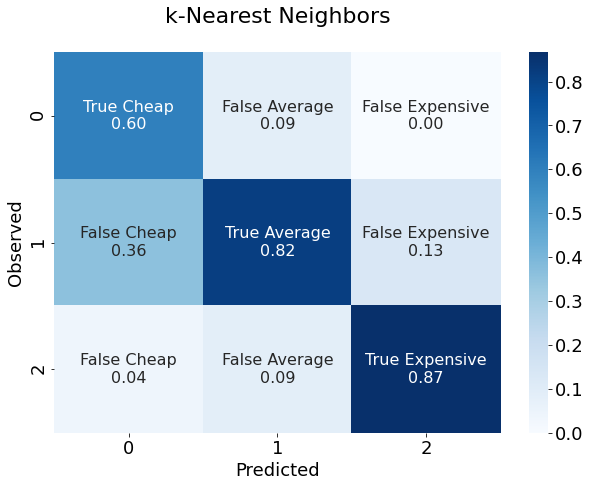

In [460]:
from sklearn.metrics import confusion_matrix
def get_conf_matrix(y_test, y_pred, title):
    # Get confusion matrix
    data = confusion_matrix(y_test, y_pred)
    # Build the confusion matrix as a dataframe table
    cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    cm.index.name = 'Observed'
    cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
        
    group_names = ['True Cheap', 'False Average', 'False Expensive', 'False Cheap',
                  'True Average', 'False Expensive', 'False Cheap','False Average','True Expensive']
    
    percentages = cm/np.sum(cm)
    percentages = np.asarray(percentages).flatten()
        
    labels = [f'{name}\n{percentage:.2f}' for name, percentage in zip(group_names,percentages)]
    labels = np.asarray(labels).reshape(3,3)
    
    # Plot a heatmap
    sns.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues',
               annot_kws={"size": 16})
    plt.title(title+"\n",fontsize=22)
    plt.show()
    
import matplotlib    
matplotlib.rcParams.update({'font.size': 18})
get_conf_matrix(y_test, y_pred, 'k-Nearest Neighbors')


In [461]:
print(pd.Series(y_pred).value_counts())

y_test.value_counts()

0    25
2    15
1    11
dtype: int64


1    20
0    16
2    15
Name: price, dtype: int64

In [462]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1_score = f1_score(y_test, y_pred, average='macro')

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))
print("Precision on test data: {:.3f}%".format(test_precision*100))
print("Recall on test data: {:.3f}%".format(test_recall*100))
print("F1 Score on test data: {:.3f}%".format(test_f1_score*100))


Accuracy on test data: 72.549%
Precision on test data: 76.162%
Recall on test data: 75.139%
F1 Score on test data: 72.634%


In [463]:
from sklearn.inspection import permutation_importance

def get_feature_importance():
    r = permutation_importance(grid.best_estimator_, X, y, n_repeats=10, random_state=0)
    
    col1=[]
    col2=[]
    col3=[]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            col1.append(X.columns[i])
            col2.append(f'{r.importances_mean[i]:.3f}')
            col3.append(f'{r.importances_std[i]:.3f}')

    return pd.DataFrame([col1,col2,col3], index=['Feature','Importance','Standard Deviation']).T
  
    
importance_df = get_feature_importance()

importance_df.style.set_table_styles(
        [{'selector' : 'th',
          'props': [('background','#3d405b'),('color','white')]},

        {'selector':'td',
        'props':[('border','2px solid black')]}])

,Feature,Importance,Standard Deviation
0,curb-weight,0.015,0.004


In [464]:
y_predicted = grid.best_estimator_.predict(X)

C:\Users\TotEu\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


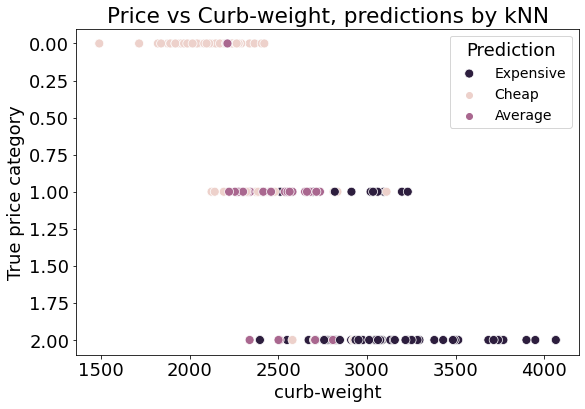

In [465]:
plt.figure(figsize=(9,6))
sns.scatterplot(X['curb-weight'], y, hue=y_predicted, s=80)
plt.ylabel('True price category')
plt.legend(['Expensive','Cheap','Average'], fontsize='14', title='Prediction')
plt.title('Price vs Curb-weight, predictions by kNN')
plt.show()

## Dropping curb weight, engine size, and then fuel system.

### --------------------- 1---------------------------

In [466]:
X1 = X.drop('curb-weight',axis=1)

In [467]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [468]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [469]:
pipe = Pipeline([
 ('preprocess', ct),
 ('clf',KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors':[3,5,10,15],
    'clf__leaf_size':[20,30,40],
    'clf__p':[1,2,3]
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3, 
                  return_train_score=True, verbose=1,)

In [470]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    3.0s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [121]:
y_pred = grid.best_estimator_.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 66.667%


## Multi-layer Perceptron classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

In [433]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


pipe = Pipeline([
 ('preprocess', ct),
 ('clf',MLPClassifier(solver='sgd'))
])

# The batch size is just = number of samples
param_grid = {
    'clf__hidden_layer_sizes':[(256,50)],
    'clf__alpha':[0.0001,0.001,0.01,0.1], #L2 penalty regulorarization term
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [434]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [435]:
grid.best_params_

{'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (256, 50)}

In [436]:
grid.best_score_

0.7317719680464778

### Test model accuracy

In [437]:
y_pred = grid.best_estimator_.predict(X_test)

In [438]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 62.745%


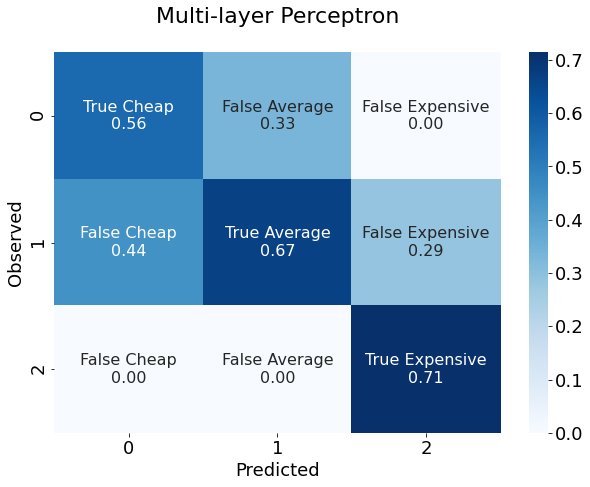

In [439]:
get_conf_matrix(y_test, y_pred,"Multi-layer Perceptron")

In [440]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1_score = f1_score(y_test, y_pred, average='macro')

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))
print("Precision on test data: {:.3f}%".format(test_precision*100))
print("Recall on test data: {:.3f}%".format(test_recall*100))
print("F1 Score on test data: {:.3f}%".format(test_f1_score*100))


Accuracy on test data: 62.745%
Precision on test data: 64.550%
Recall on test data: 67.917%
F1 Score on test data: 56.831%


In [441]:
importance_df = get_feature_importance()

importance_df.style.set_table_styles(
        [{'selector' : 'th',
          'props': [('background','#3d405b'),('color','white')]},

        {'selector':'td',
        'props':[('border','2px solid black')]}])

,Feature,Importance,Standard Deviation
0,fuel-system,0.028,0.012


### --------------------- 1---------------------------

In [123]:
X1 = X.drop('fuel-system',axis=1)

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


pipe = Pipeline([
 ('preprocess', ct),
 ('clf',MLPClassifier(solver='sgd'))
])

# The batch size is just = number of samples
param_grid = {
    'clf__hidden_layer_sizes':[(256,50)],
    'clf__alpha':[0.0001,0.001,0.01,0.1], #L2 penalty regulorarization term
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [127]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [128]:
y_pred = grid.best_estimator_.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 56.863%


## ------------------------------------ 2 ------------------------------

In [132]:
X1 = X.drop('num-of-cylinders',axis=1)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [134]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


pipe = Pipeline([
 ('preprocess', ct),
 ('clf',MLPClassifier(solver='sgd'))
])

# The batch size is just = number of samples
param_grid = {
    'clf__hidden_layer_sizes':[(256,50)],
    'clf__alpha':[0.0001,0.001,0.01,0.1], #L2 penalty regulorarization term
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [136]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [137]:
y_pred = grid.best_estimator_.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 66.667%


## -------------------------------- 3 -------------------------------------

In [144]:
X1 = X.drop('make',axis=1)

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


pipe = Pipeline([
 ('preprocess', ct),
 ('clf',MLPClassifier(solver='sgd'))
])

# The batch size is just = number of samples
param_grid = {
    'clf__hidden_layer_sizes':[(256,50)],
    'clf__alpha':[0.0001,0.001,0.01,0.1], #L2 penalty regulorarization term
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [148]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [149]:
y_pred = grid.best_estimator_.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 68.627%


In [151]:
print(pd.Series(y_pred).value_counts())

y_test.value_counts()

0    23
2    18
1    10
dtype: int64


1    20
0    16
2    15
Name: price, dtype: int64

## Support Vector Machines (SVM)

In [486]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

In [487]:
from sklearn.svm import SVC

pipe = Pipeline([
 ('preprocess', ct),
 ('clf',SVC())
])

# The batch size is just = number of samples
param_grid = {
    'clf__C':[10e-5,10e-3,10e0,10e1,10e3],
    'clf__kernel':['rbf','poly','linear'],
    'clf__degree':[2,3,4,5,6]
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [488]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.9s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [489]:
grid.best_params_

{'clf__C': 10.0, 'clf__degree': 2, 'clf__kernel': 'rbf'}

In [490]:
grid.best_score_

0.7253812636165579

In [491]:
y_test.value_counts()

1    20
0    16
2    15
Name: price, dtype: int64

### Test model accuracy

In [492]:
y_pred = grid.best_estimator_.predict(X_test)

In [493]:
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 82.353%


In [494]:
pd.Series(y_pred).value_counts()

1    25
0    15
2    11
dtype: int64

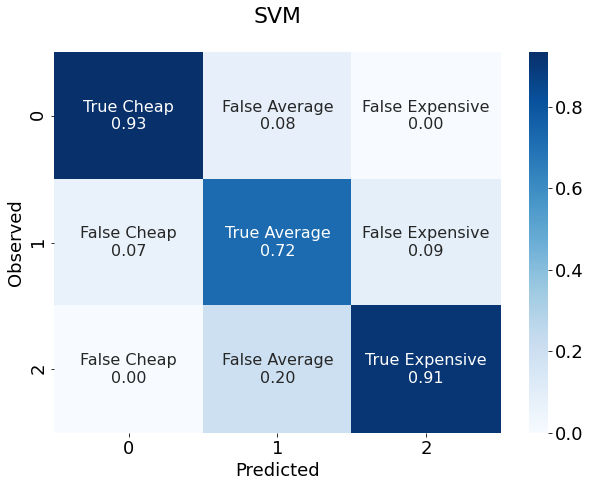

In [495]:
get_conf_matrix(y_test, y_pred, "SVM")

In [496]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1_score = f1_score(y_test, y_pred, average='macro')

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))
print("Precision on test data: {:.3f}%".format(test_precision*100))
print("Recall on test data: {:.3f}%".format(test_recall*100))
print("F1 Score on test data: {:.3f}%".format(test_f1_score*100))


Accuracy on test data: 82.353%
Precision on test data: 85.414%
Recall on test data: 81.389%
F1 Score on test data: 82.415%


In [497]:
importance_df = get_feature_importance()

importance_df.style.set_table_styles(
        [{'selector' : 'th',
          'props': [('background','#3d405b'),('color','white')]},

        {'selector':'td',
        'props':[('border','2px solid black')]}])

,Feature,Importance,Standard Deviation
0,fuel-system,0.128,0.018
1,drive-wheels,0.064,0.012
2,make,0.055,0.016
3,aspiration,0.037,0.007
4,num-of-cylinders,0.023,0.006
5,bore,0.015,0.005


In [498]:
svm_features = ['highway-mpg','curb-weight','city-mpg','fuel-system',
               'make','drive-wheels','body-style','num-of-cylinders','aspiration',
               'fuel-type']

### --------------------- 1---------------------------

In [515]:
X1 = X.drop('highway-mpg',axis=1)

In [516]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [517]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [518]:
pipe = Pipeline([
 ('preprocess', ct),
 ('clf',SVC())
])

# The batch size is just = number of samples
param_grid = {
    'clf__C':[10e-5,10e-3,10e0,10e1,10e3],
    'clf__kernel':['rbf','poly','linear'],
    'clf__degree':[2,3,4,5,6]
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [519]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.6s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [520]:
y_pred = grid.best_estimator_.predict(X_test)

In [521]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 94.118%


## ------------------------------------ 2 ------------------------------

In [522]:
X1 = X.drop('curb-weight',axis=1)

In [523]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [524]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [525]:
pipe = Pipeline([
 ('preprocess', ct),
 ('clf',SVC())
])

# The batch size is just = number of samples
param_grid = {
    'clf__C':[10e-5,10e-3,10e0,10e1,10e3],
    'clf__kernel':['rbf','poly','linear'],
    'clf__degree':[2,3,4,5,6]
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [526]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.8s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [527]:
y_pred = grid.best_estimator_.predict(X_test)

In [528]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 82.353%


## -------------------------------- 3 -------------------------------------

In [529]:
X1 = X.drop('city-mpg',axis=1)

In [530]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [531]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [532]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
 ('preprocess', ct),
 ('clf',LogisticRegression())
])

# The batch size is just = number of samples
param_grid = {
    'clf__solver':['lbfgs','saga'],
    'clf__multi_class':['ovr','multinomial'],
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [533]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sa

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [534]:
y_pred = grid.best_estimator_.predict(X_test)

In [535]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 80.392%


In [171]:
print(pd.Series(y_pred).value_counts())

y_test.value_counts()

0    20
2    16
1    15
dtype: int64


1    20
0    16
2    15
Name: price, dtype: int64

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

In [443]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
 ('preprocess', ct),
 ('clf',LogisticRegression())
])

# The batch size is just = number of samples
param_grid = {
    'clf__solver':['lbfgs','saga'],
    'clf__multi_class':['ovr','multinomial'],
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [444]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sa

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [445]:
grid.best_params_

{'clf__multi_class': 'multinomial', 'clf__solver': 'lbfgs'}

In [446]:
grid.best_score_

0.7324255628177196

### Test model accuracy

In [447]:
y_pred = grid.best_estimator_.predict(X_test)

In [448]:
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 80.392%


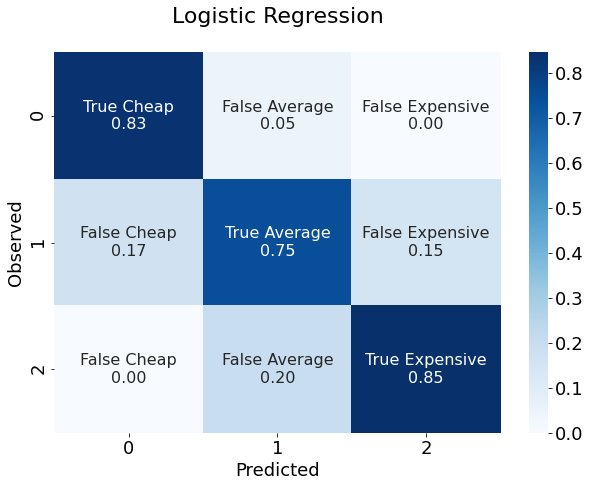

In [449]:
get_conf_matrix(y_test, y_pred, "Logistic Regression")

In [450]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1_score = f1_score(y_test, y_pred, average='macro')

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))
print("Precision on test data: {:.3f}%".format(test_precision*100))
print("Recall on test data: {:.3f}%".format(test_recall*100))
print("F1 Score on test data: {:.3f}%".format(test_f1_score*100))


Accuracy on test data: 80.392%
Precision on test data: 80.983%
Recall on test data: 80.694%
F1 Score on test data: 80.602%


In [451]:
importance_df = get_feature_importance()

importance_df.style.set_table_styles(
        [{'selector' : 'th',
          'props': [('background','#3d405b'),('color','white')]},

        {'selector':'td',
        'props':[('border','2px solid black')]}])

,Feature,Importance,Standard Deviation
0,fuel-system,0.148,0.017
1,make,0.092,0.022
2,drive-wheels,0.078,0.015
3,num-of-cylinders,0.046,0.012
4,bore,0.031,0.009
5,aspiration,0.030,0.011
6,curb-weight,0.026,0.012
7,symboling,0.023,0.009
8,height,0.019,0.006
9,stroke,0.014,0.003


In [320]:
lr_features = ['fuel-system','make','drive-wheels','num-of-cylinders',
               'bore','aspiration','curb-weight','symboling','height','stroke']

### --------------------- 1---------------------------

In [152]:
X1 = X.drop('fuel-system',axis=1)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [155]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
 ('preprocess', ct),
 ('clf',LogisticRegression())
])

# The batch size is just = number of samples
param_grid = {
    'clf__solver':['lbfgs','saga'],
    'clf__multi_class':['ovr','multinomial'],
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [156]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sa

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [157]:
y_pred = grid.best_estimator_.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 80.392%


## ------------------------------------ 2 ------------------------------

In [160]:
X1 = X.drop('make',axis=1)

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [162]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [172]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
 ('preprocess', ct),
 ('clf',LogisticRegression())
])

# The batch size is just = number of samples
param_grid = {
    'clf__solver':['lbfgs','saga'],
    'clf__multi_class':['ovr','multinomial'],
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [173]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sa

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [174]:
y_pred = grid.best_estimator_.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 74.510%


## -------------------------------- 3 -------------------------------------

In [176]:
X1 = X.drop('drive-wheels',axis=1)

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size=0.25,random_state=1)

In [178]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer to scale numerical data, encode categorical variables
#    And ordinal encode Global Sales


continous = X1.select_dtypes('float64').columns.tolist()+\
            X1.select_dtypes('int64').columns.tolist()
categorical = X1.select_dtypes('object').columns.tolist()

ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [179]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
 ('preprocess', ct),
 ('clf',LogisticRegression())
])

# The batch size is just = number of samples
param_grid = {
    'clf__solver':['lbfgs','saga'],
    'clf__multi_class':['ovr','multinomial'],
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [180]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\linear_model\_sa

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [181]:
y_pred = grid.best_estimator_.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 74.510%


In [452]:
print(pd.Series(y_pred).value_counts())

y_test.value_counts()

1    20
0    18
2    13
dtype: int64


1    20
0    16
2    15
Name: price, dtype: int64

## Rerun DT and LR using relevant columns

In [380]:
relevant_cols = list(set(svm_features+lr_features))

In [381]:
len(relevant_cols)

14

In [382]:
print(relevant_cols)

['height', 'fuel-system', 'highway-mpg', 'city-mpg', 'make', 'stroke', 'drive-wheels', 'curb-weight', 'body-style', 'num-of-cylinders', 'symboling', 'aspiration', 'bore', 'fuel-type']


In [386]:
X=X[relevant_cols]

In [387]:
X

,height,fuel-system,highway-mpg,city-mpg,make,stroke,drive-wheels,curb-weight,body-style,num-of-cylinders,symboling,aspiration,bore,fuel-type
0,48.8,mpfi,27,21,alfa-romero,2.68,rwd,2548,convertible,four,3,std,3.47,gas
1,48.8,mpfi,27,21,alfa-romero,2.68,rwd,2548,convertible,four,3,std,3.47,gas
2,52.4,mpfi,26,19,alfa-romero,3.47,rwd,2823,hatchback,six,1,std,2.68,gas
3,54.3,mpfi,30,24,audi,3.40,fwd,2337,sedan,four,2,std,3.19,gas
4,54.3,mpfi,22,18,audi,3.40,4wd,2824,sedan,five,2,std,3.19,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,55.5,mpfi,28,23,volvo,3.15,rwd,2952,sedan,four,-1,std,3.78,gas
201,55.5,mpfi,25,19,volvo,3.15,rwd,3049,sedan,four,-1,turbo,3.78,gas
202,55.5,mpfi,23,18,volvo,2.87,rwd,3012,sedan,six,-1,std,3.58,gas
203,55.5,idi,27,26,volvo,3.40,rwd,3217,sedan,six,-1,turbo,3.01,diesel


In [388]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

In [389]:
continous = X.select_dtypes('float64').columns.tolist()+\
            X.select_dtypes('int64').columns.tolist()
categorical = X.select_dtypes('object').columns.tolist()

In [390]:
ct = ColumnTransformer([
 ("continous", MinMaxScaler(), continous),
 ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical)
])

### SVM

In [471]:
pipe = Pipeline([
 ('preprocess', ct),
 ('clf',SVC())
])

param_grid = {
    'clf__C':[10e-5,10e-3,10e0,10e1,10e3],
    'clf__kernel':['rbf','poly','linear'],
    'clf__degree':[2,3,4,5,6]
}

grid=GridSearchCV(estimator=pipe, param_grid=param_grid,cv=3,
 scoring='recall_macro',return_train_score=True,
 verbose=1,)

In [472]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.6s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continous',
                                                                         MinMaxScaler(),
                                                                         ['wheel-base',
                                                                          'length',
                                                                          'height',
                                                                          'bore',
                                                                          'stroke',
                                                                          'compression-ratio',
                                                                          'horsepower',
                                                                          'peak-rpm',
                                                             

In [473]:
grid.best_score_

0.7253812636165579

In [474]:
grid.best_params_

{'clf__C': 10.0, 'clf__degree': 2, 'clf__kernel': 'rbf'}

In [475]:
y_pred = grid.best_estimator_.predict(X_test)

In [476]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))

Accuracy on test data: 82.353%


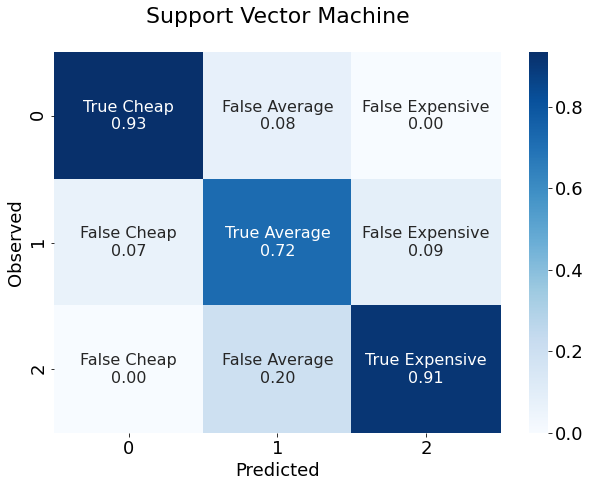

In [477]:
from sklearn.metrics import confusion_matrix
def get_conf_matrix(y_test, y_pred, title):
    # Get confusion matrix
    data = confusion_matrix(y_test, y_pred)
    # Build the confusion matrix as a dataframe table
    cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    cm.index.name = 'Observed'
    cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
        
    group_names = ['True Cheap', 'False Average', 'False Expensive', 'False Cheap',
                  'True Average', 'False Expensive', 'False Cheap','False Average','True Expensive']
    
    percentages = cm/np.sum(cm)
    percentages = np.asarray(percentages).flatten()
        
    labels = [f'{name}\n{percentage:.2f}' for name, percentage in zip(group_names,percentages)]
    labels = np.asarray(labels).reshape(3,3)
    
    # Plot a heatmap
    sns.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues',
               annot_kws={"size": 16})
    plt.title(title+"\n",fontsize=22)
    plt.show()
    
import matplotlib    
matplotlib.rcParams.update({'font.size': 18})
get_conf_matrix(y_test, y_pred, 'Support Vector Machine')


In [478]:
print(pd.Series(y_pred).value_counts())

y_test.value_counts()

1    25
0    15
2    11
dtype: int64


1    20
0    16
2    15
Name: price, dtype: int64

In [479]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1_score = f1_score(y_test, y_pred, average='macro')

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))
print("Precision on test data: {:.3f}%".format(test_precision*100))
print("Recall on test data: {:.3f}%".format(test_recall*100))
print("F1 Score on test data: {:.3f}%".format(test_f1_score*100))


Accuracy on test data: 82.353%
Precision on test data: 85.414%
Recall on test data: 81.389%
F1 Score on test data: 82.415%


In [480]:
from sklearn.inspection import permutation_importance

def get_feature_importance():
    r = permutation_importance(grid.best_estimator_, X, y, n_repeats=10, random_state=0)
    
    col1=[]
    col2=[]
    col3=[]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            col1.append(X.columns[i])
            col2.append(f'{r.importances_mean[i]:.3f}')
            col3.append(f'{r.importances_std[i]:.3f}')

    return pd.DataFrame([col1,col2,col3], index=['Feature','Importance','Standard Deviation']).T
  
    
importance_df = get_feature_importance()

importance_df.style.set_table_styles(
        [{'selector' : 'th',
          'props': [('background','#3d405b'),('color','white')]},

        {'selector':'td',
        'props':[('border','2px solid black')]}])

C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compo

C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compo

C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compo

C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compo

C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
C:\Users\TotEu\anaconda3\lib\site-packages\sklearn\compo

,Feature,Importance,Standard Deviation
0,fuel-system,0.128,0.018
1,drive-wheels,0.064,0.012
2,make,0.055,0.016
3,aspiration,0.037,0.007
4,num-of-cylinders,0.023,0.006
5,bore,0.015,0.005


In [481]:
X.shape

(201, 22)

In [482]:
X

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,height,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,front,109.1,188.8,55.5,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,volvo,gas,turbo,sedan,rwd,front,109.1,188.8,55.5,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,volvo,gas,std,sedan,rwd,front,109.1,188.8,55.5,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,volvo,diesel,turbo,sedan,rwd,front,109.1,188.8,55.5,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [483]:
def change_names(a):
    if a==0:
        return 'Cheap'
    if a==1:
        return 'Average'
    if a==2:
        return 'Expensive'

In [484]:
df.price = df.price.apply(change_names)

In [485]:
q=1
plt.figure(figsize=(16,12))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(df[j],hue=df.Exited, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

NameError: name 'fig_data' is not defined

<Figure size 1152x864 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,9))
plt.subplot(2,2,1)
sns.boxplot(x='price', y='curb-weight', data=df)
plt.xlabel('')
plt.subplot(2,2,2)
sns.boxplot(x='price', y='stroke', data=df)
plt.xlabel('')
plt.subplot(2,2,3)
sns.boxplot(x='price', y='highway-mpg', data=df)
plt.xlabel('')
plt.subplot(2,2,4)
sns.boxplot(x='price', y='city-mpg', data=df)
plt.xlabel('')
plt.show()

In [422]:
df.price.value_counts()

Expensive    68
Cheap        67
Average      66
Name: price, dtype: int64